# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Predictive Checks: Prior and Posterior__

<br>

Author:  Tyler J. Brough <br>
Updated: December 1, 2021 <br>

---

<br>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
## Simulate data from the population
theta = 0.5
N = 100
flips = np.random.binomial(n=1, p=theta, size=N);
flips

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [4]:
class BetaBinomial:
    def __init__(self, alpha = 1, beta = 1):
        self.alpha = alpha
        self.beta = beta
        
    def fit(self, x):
        self.alpha +=  np.sum(x)
        self.beta += len(x) - np.sum(x)
        
    def plot(self):
        x = np.linspace(0, 1, 1000)
        y = stats.beta.pdf(x, self.alpha, self.beta)
        plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
        plt.fill_between(x, y, facecolor='orange', alpha=0.5)
        plt.title(f"Beta({self.alpha},{self.beta}) Prior Distribution")
        plt.show()
        
    def hdi(self, a=0.05):
        lower = stats.beta(self.alpha, self.beta).ppf(a/2.)
        upper = stats.beta(self.alpha, self.beta).ppf(1. - (a/2.))
        return (lower, upper)

## __Prior Predictive Simulation__

In [6]:
betty = BetaBinomial(alpha=2, beta=2)

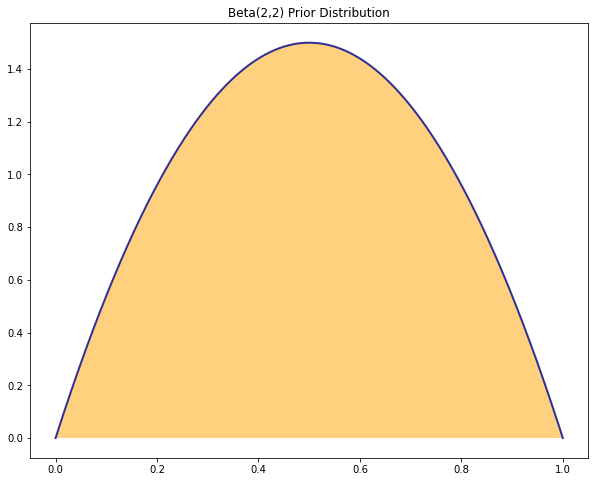

In [7]:
betty.plot()

In [9]:
a_star, b_star = betty.alpha, betty.beta
M = 10_000
y_star = np.zeros(M)

for m in range(M):
    theta_star = np.random.beta(a=a_star, b=b_star, size=1)
    y_star[m] = np.random.binomial(n=1, p=theta_star, size=1)

In [10]:
np.mean(y_star), np.std(y_star, ddof=1) / np.sqrt(M)

(0.5012, 0.005000235618010772)

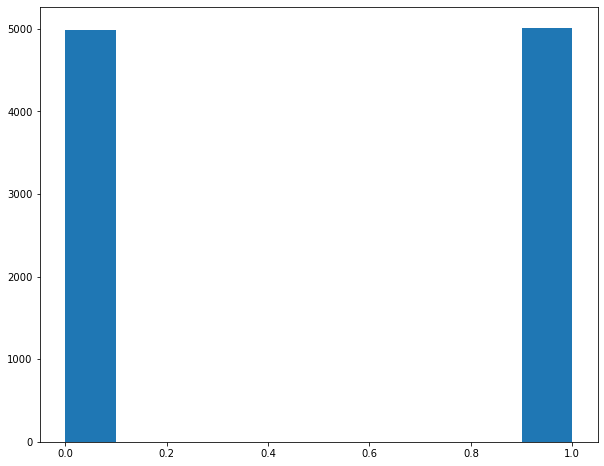

In [11]:
plt.hist(y_star);

## __Posterior Predictive Simulation__

In [12]:
betty.fit(flips)

In [13]:
a_post_star, b_post_star = betty.alpha, betty.beta

In [14]:
a_post_star, b_post_star

(58, 46)

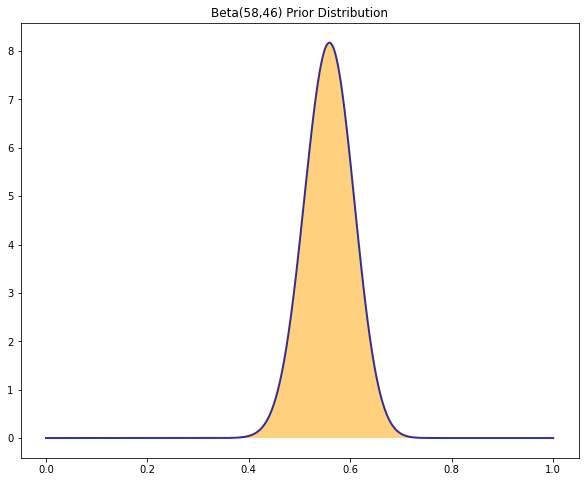

In [15]:
betty.plot()